In [ ]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\poorvika\Desktop\VSC Folder\MLPackage\FraudDetection.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
data.info()
data.describe()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86

In [4]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [5]:
null_values = data.isnull().sum()
print("Null values per column:")
print(null_values)
print("Any null values present:", data.isnull().values.any())

Null values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Any null values present: False


In [ ]:
fraud_count = data['isFraud'].sum()  
print(f"Number of fraud transactions: {fraud_count}") 

Number of fraud transactions: 8213


In [ ]:
# Drop some columns which don't have much effect 
data = data.drop(columns=['step','nameOrig', 'nameDest','isFlaggedFraud'])
print(data.head()) 


       type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   PAYMENT   9839.64       170136.0       160296.36             0.0   
1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0  


NORMALIZATION

In [8]:
#OneHotEncoder has type is a categorical variable
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data, columns=['type'], drop_first=True)
print(data.head()) 

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   isFraud  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0        0          False       False          True          False  
1        0          False       False          True          False  
2        1          False       False         False           True  
3        1           True       False         False          False  
4        0          False       False          True          False  


In [38]:
# #Frequency encoding for nameOrig and nameDest as they are unique id's
# name_orig_counts = data['nameOrig'].value_counts()
# data['nameOrig_freq'] = data['nameOrig'].map(name_orig_counts)
# name_dest_counts = data['nameDest'].value_counts()
# data['nameDest_freq'] = data['nameDest'].map(name_dest_counts)

# print(data.head())

In [ ]:
columns_to_normalize = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Applying z-score normalization
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
print(data.head()) 

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0 -0.281560      -0.229810       -0.237622       -0.323814       -0.333411   
1 -0.294767      -0.281359       -0.285812       -0.323814       -0.333411   
2 -0.297555      -0.288654       -0.292442       -0.323814       -0.333411   
3 -0.297555      -0.288654       -0.292442       -0.317582       -0.333411   
4 -0.278532      -0.274329       -0.282221       -0.323814       -0.333411   

   isFraud  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0        0          False       False          True          False  
1        0          False       False          True          False  
2        1          False       False         False           True  
3        1           True       False         False          False  
4        0          False       False          True          False  


In [ ]:
! pip install imblearn 

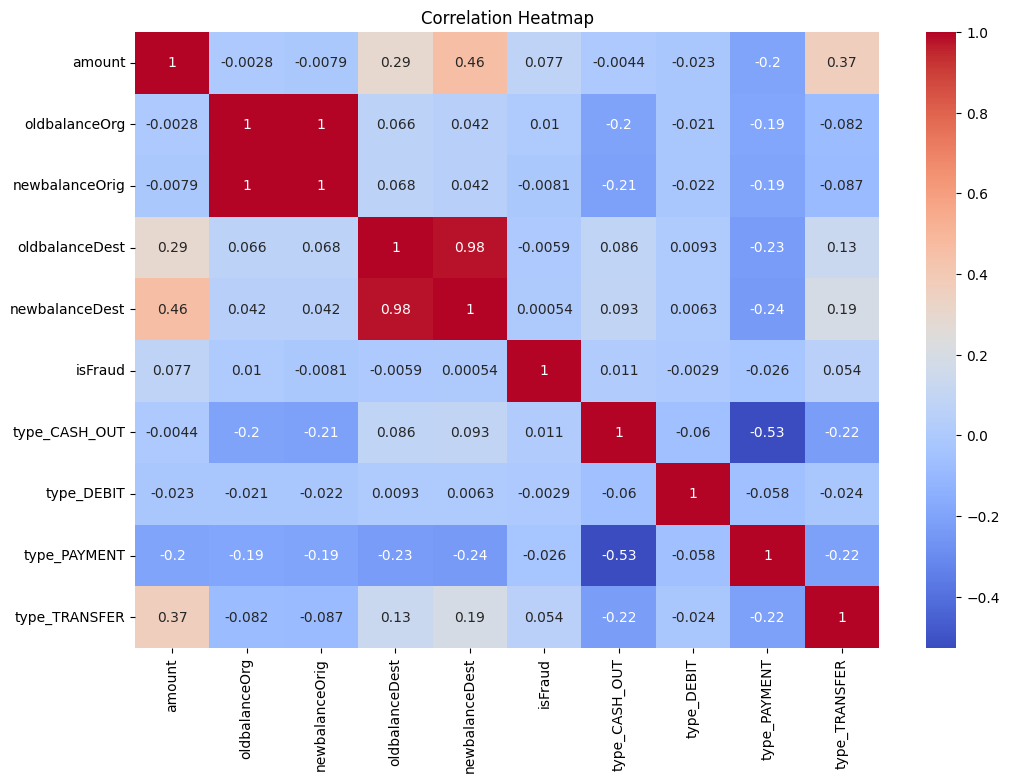

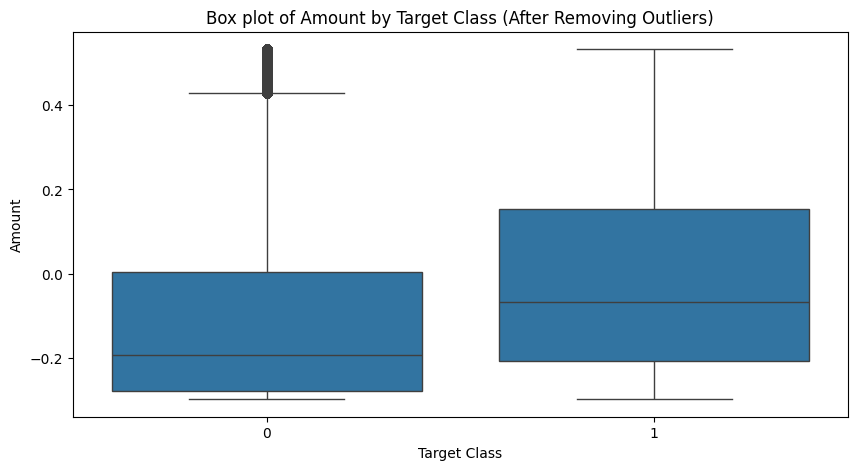

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = data[(data['amount'] >= lower_bound) & (data['amount'] <= upper_bound)]

# Box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_data['isFraud'], y=filtered_data['amount']) 
plt.title("Box plot of Amount by Target Class (After Removing Outliers)")
plt.xlabel("Target Class")
plt.ylabel("Amount")
plt.show()


In [11]:
filtered_data.reset_index(drop=True, inplace=True)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024542 entries, 0 to 6024541
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   type_CASH_OUT   bool   
 7   type_DEBIT      bool   
 8   type_PAYMENT    bool   
 9   type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(1)
memory usage: 298.8 MB


In [12]:
data = filtered_data
null_values = data.isnull().sum()
print("Null values per column:")
print(null_values)
print("Any null values present:", data.isnull().values.any())

Null values per column:
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64
Any null values present: False


Starting Round 1...
Confusion Matrix for Random Forest Round 1:
[[888335  14716]
 [     2    628]]
Metrics for Round 1:
Accuracy: 0.9837, Precision: 0.0409, Recall: 0.9968, F1 Score: 0.0786
Class distribution before SMOTE for Round 1:
isFraud
0    246084
1       309
Name: count, dtype: int64
Starting Round 2...
Confusion Matrix for Random Forest Round 2:
[[902371    680]
 [    98    532]]
Metrics for Round 2:
Accuracy: 0.9991, Precision: 0.4389, Recall: 0.8444, F1 Score: 0.5776
Class distribution before SMOTE for Round 2:
isFraud
0    590338
1        36
Name: count, dtype: int64
Starting Round 3...
Confusion Matrix for Random Forest Round 3:
[[902621    430]
 [   139    491]]
Metrics for Round 3:
Accuracy: 0.9994, Precision: 0.5331, Recall: 0.7794, F1 Score: 0.6331
Class distribution before SMOTE for Round 3:
isFraud
0    606683
1       309
Name: count, dtype: int64
Starting Round 4...
Confusion Matrix for Random Forest Round 4:
[[902748    303]
 [   161    469]]
Metrics for Round 4:
A

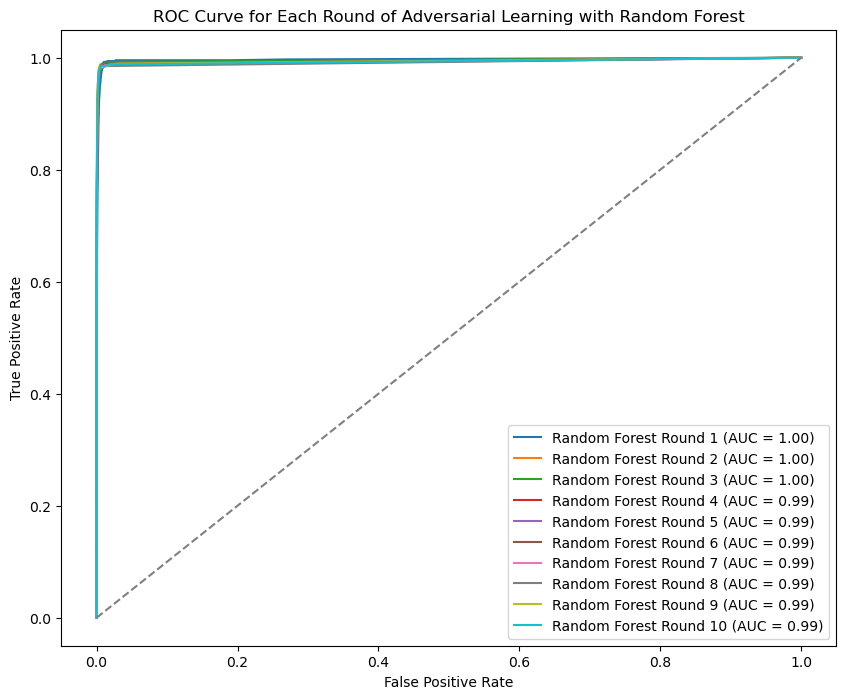

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    return model

def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def fit_gmm(X, n_components=2):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    return gmm

def apply_smote(X, y):
    smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

def compute_roc_auc(y_val, y_val_pred):
    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def downsample_majority_class(X, y):
    df = pd.DataFrame(X)
    df['isFraud'] = y

    majority = df[df['isFraud'] == 0]
    minority = df[df['isFraud'] == 1]

    # Downsample majority class
    majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)  
    # Combine minority class with downsampled majority class
    downsampled = pd.concat([majority_downsampled, minority])
    return downsampled.drop(columns=['isFraud']), downsampled['isFraud']

def adversarial_learning(data, n_rounds):
    plt.figure(figsize=(10, 8)) 

    train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% train, 30% temp
    test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)  

    for i in range(n_rounds):
        print(f"Starting Round {i + 1}...")

        X_train = train_data.drop(columns=['isFraud'])  
        y_train = train_data['isFraud']

        X_train, y_train = downsample_majority_class(X_train, y_train)

        model_rf = train_random_forest(X_train, y_train)

        X_test = test_data.drop(columns=['isFraud'])
        y_test = test_data['isFraud']
        y_pred_rf = model_rf.predict(X_test)

        conf_matrix_rf = calculate_confusion_matrix(y_test, y_pred_rf)
        print(f"Confusion Matrix for Random Forest Round {i + 1}:\n{conf_matrix_rf}")

        accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_rf)
        print(f"Metrics for Round {i + 1}:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        gmm = fit_gmm(X_train) 

        probs = gmm.predict_proba(X_test)
        assigned_components = np.argmax(probs, axis=1)

        false_negatives = conf_matrix_rf[1][0]  # FN
        total_negatives = conf_matrix_rf[1].sum()  # TP + FN
        false_negative_rate = false_negatives / total_negatives if total_negatives > 0 else 0

        best_strategy = assigned_components[np.argmax(false_negative_rate)]
        best_fraud_indices = np.where(assigned_components == best_strategy)[0]
        best_fraud = test_data.iloc[best_fraud_indices]

        X_best_fraud = best_fraud.drop(columns=['isFraud'])
        y_best_fraud = best_fraud['isFraud']

        class_counts = y_best_fraud.value_counts()
        print(f"Class distribution before SMOTE for Round {i + 1}:\n{class_counts}")

        # Apply SMOTE only if minority class has enough samples
        if class_counts[1] > 1: 
            X_synthetic, y_synthetic = apply_smote(X_best_fraud, y_best_fraud)
        else:
            print(f"Skipping SMOTE for Round {i + 1} due to insufficient minority samples: {class_counts}")
            continue  # Skip to the next round if SMOTE cannot be applied

        # Append synthetic data to dataset for the next round
        synthetic_data = pd.DataFrame(X_synthetic, columns=X_best_fraud.columns)
        synthetic_data['isFraud'] = y_synthetic

        # Combine synthetic data with training data for next iteration
        train_data = pd.concat([train_data, synthetic_data], ignore_index=True)

        # Test model on validation set
        X_val = val_data.drop(columns=['isFraud'])
        y_val = val_data['isFraud']      
        y_val_pred_rf = model_rf.predict_proba(X_val)[:, 1]

        # Compute ROC and AUC
        fpr_rf, tpr_rf, roc_auc_rf = compute_roc_auc(y_val, y_val_pred_rf)

        # Plot ROC curve for the current round on the same graph
        plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Round {i + 1} (AUC = {roc_auc_rf:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('ROC Curve for Each Round of Adversarial Learning with Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

n_rounds = 10
adversarial_learning(data, n_rounds)
